# ENPH 213 - Week 6 Lab

In this lab, we will be working on interpolating between finite data sets using a variety of different methods while continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab6, where LastName is your last name.  Submit that file to onQ.  Also, include your Lab4.py file (or similar) to ensure that the notebook can run without error.

For marking Parts 1-4 will be marked together (Weighted out of 10) and Part 5 will be marked separately (Weighted out of 5).

In [1]:
#Import the libraires required for the lab
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

In [2]:
## code from Lab 4 to implement BackSub
# this makes it easier to run one file instead of importing the function which had caused problems

def GaussPivot(Ab , col):
    #goal is to simulate the rows that need to be pivoted
    if ((np.max(Ab[col:,col])) > (Ab[col,col])): # test codition for swapping rows
       
        Ab[[col,np.argmax(Ab[col:,col]) + col],:] = Ab[[np.argmax(Ab[col:,col]) + col,col], :] #swapping rows
        
    return Ab

def GaussElim(Ab,col):
    #call the pivot func
    Ab1 = GaussPivot(Ab, col)
    Nrows = Ab.shape[0]  # set the bounds of the loop to the rows in the array
    
    # loop through the array and use the eqn given
    # row i = row i - Aij/Ajj * row j
    for i in range(col+1, Nrows):
       
        Ab1[i][:] = Ab1[i][:]-(Ab1[i][col]/(np.copy(Ab1[col][col])))*Ab1[col][:]
    
    return Ab1

def UpTriang(A, b):
    
    column = A.shape[0] # number of col
    
    Ab = np.concatenate([np.array(A),np.transpose(np.array(b))], 1) # making the new array with b on A
  
    copy = np.copy(Ab) # copying the array
    
    for i in range(column): # looping through the array
        copy = GaussElim(copy,i) # calling our elim func for increasing columns
        
    return copy

#Function from Lab 4
def BackSub(A,b):
    
    upperA = UpTriang(A,b) # call the Uptriangle Func
    
    for i in range(A.shape[0]): # loop through for num columns
        
        upperA[i,:] = upperA[i,:]/upperA[i,i]
        
    copy = np.copy(upperA) # make a copy of array
    
    # nest for loops to iterate throught the array
    for a in range(upperA.shape[0]-1,-1,-1):
        
        for b in range(a-1,-1,-1):
            
            copy[b,:] = copy[b,:]-upperA[a,:]*upperA[b,a] # subtract and set new value
            
            upperA = np.copy(copy)
            
            newArray = upperA[:,A.shape[0]] 
    return newArray

## Part 1

Consider the data set consisting of the following $x$-values

0.5, 2.6, 3.8, 4.7, 5.6, 7.1, 8.9

and the corresponding $y$-values

0.01963664, 0.07507309, 0.23405139, 0.29202742, 0.13045487, 0.03839685, 0.01497929

Here in Part 1, you will interpolate the data using a polynomial.  Start by ensuring that you know what order of polynomial you should use.  Then, create the matrix that you need to diagonalize, and then call your BackSub(A, b) function from Lab 4 to solve for the polynomial coefficients.

For output, plot the interpolated function from $ x = $ 0 to 9.5, along with the points from the data set.  As well, output the interpolated values for the following $x$-values:

1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8


**Note: You will again need your BackSub(A,b) function from Lab 4.  Place the saved Lab4.py file in the same directory as this notebook, and use "from Lab4 import BackSub".  Submit the Lab4.py file with this notebook so that it can run when refreshed before marking.**

In [3]:
# declare the given values
xValues = [0.5, 2.6, 3.8, 4.7, 5.6, 7.1, 8.9]
yValues = [0.01963664, 0.07507309, 0.23405139, 0.29202742, 0.13045487, 0.03839685, 0.01497929]

length = len(xValues)   # use a polynomial of length-1 

# function to return the coefficients
def Coeff(x, y,length):
    array = [] # create an empty array

    for i in xValues:
        for j in range(length):
            array.append(i**j)
        
    #now reshape the array to be n by n (length by length)
    A = np.reshape(array,[length,length])

    # set b = yValues array
    c = BackSub(A,[yValues]) # call the backsub funtion to solve for the coeff
    return c


print("The coefficients Array for the given values\n\n",Coeff(xValues, yValues,length))

The coefficients Array for the given values

 [-1.39759644e+00  4.47113268e+00 -3.99138122e+00  1.58357912e+00
 -3.09225127e-01  2.90427475e-02 -1.04674750e-03]


In [4]:
# function to return a y value using the interpolation of a given x
def InterpY (x, y):
    
    length = len(y) # declare the length of y
    c = Coeff(x, y,length) # call the coefficient func
    interpY = 0 # initalize as zero
    
    for i in range(length):
        interpY += c[i] * x**i #weighted sum
        
    return interpY

The given data
Given x [0.5, 2.6, 3.8, 4.7, 5.6, 7.1, 8.9]
Given y [0.01963664, 0.07507309, 0.23405139, 0.29202742, 0.13045487, 0.03839685, 0.01497929] 

Interpolation of given points
Given x [1.1 2.2 3.3 4.4 5.5 6.6 7.7 8.8]
Given y [ 0.39100478  0.11685285  0.14257795  0.29797831  0.15497775 -0.03256824
  0.27578206  0.17655975] 



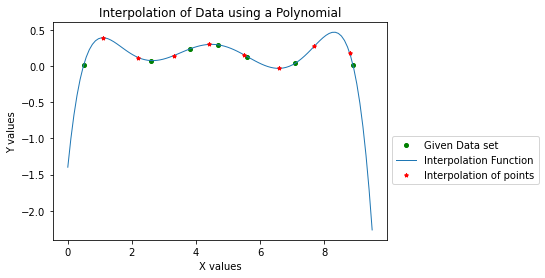

In [5]:
# given points
print("The given data")    # test prints
print("Given x",xValues)
print("Given y",yValues,"\n")

plt.plot(xValues, yValues, 'go', label = 'Given Data set', markersize = 4) # plot the given points

xPlot = np.linspace(0,9.5,100) # x-range for the function
yPlot = InterpY(xPlot,yValues) # find the interpolation for each x
plt.plot(xPlot,yPlot,label = 'Interpolation Function',linewidth = 1) # plot the determined function

interpX  = np.array([1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8]) # given x points
polyY = InterpY(interpX, yValues) # y values using the interpolation of each x
plt.plot(interpX, polyY, 'r*', label = 'Interpolation of points', markersize = 4) # plot the interpolated points

print("Interpolation of given points")    # test prints to check that the plot makes sense
print("Given x",interpX)
print("Given y",polyY,"\n")

plt.title("Interpolation of Data using a Polynomial")
plt.xlabel("X values")
plt.ylabel("Y values")

plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()


# Part 2

Use the same (x,y) dataset from Part 1.

Here in Part 2, you will interpolate the data using Lagrange functions.  Start by ensuring that you know what order of polynomial you should use.  Then, create a function that can calculate the Lagrange function at a particular $x$ and $k$.  Use that function with appropriate coefficients in a sum to calculate the requested output.

For output, plot the interpolated function from 0 to 9.5, along with the points from the data set.  As well, output the interpolated values for the following $x$-values:

1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8

Given Values
The x values [0.5, 2.6, 3.8, 4.7, 5.6, 7.1, 8.9] 
The y values [0.01963664, 0.07507309, 0.23405139, 0.29202742, 0.13045487, 0.03839685, 0.01497929]


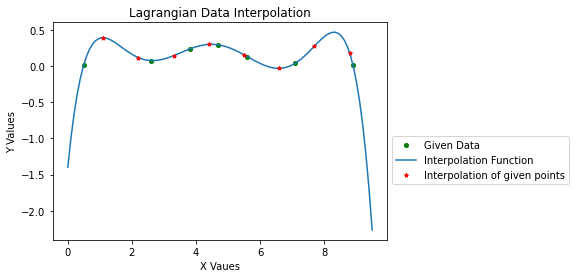

Interpolation of given points
Given x [1.1 2.2 3.3 4.4 5.5 6.6 7.7 8.8]
Given y [0.3910047834737179, 0.11685285162994921, 0.14257794788882586, 0.2979783070719154, 0.1549777518209314, -0.03256823983759926, 0.27578205962826846, 0.1765597479324404] 



In [6]:
# same x and y values

print("Given Values\nThe x values",xValues,"\nThe y values",yValues)

# Lagrange funtion
def Lagrange(x, X, Lnum):      
    top = 1  # initalize the top and bottom as 1
    bottom = 1
    
    #iterate throught the Lagrangian eqn
    for i in range(len(x)):
        
        if (x[Lnum]-x[i]!=0): # coditionals of the lagrange
            top *= (X - x[i]) # calculate the top of the Langrange
            bottom *= (x[Lnum] - x[i]) # calculate the bottom
            
    Lag = top/bottom # divide the top by bottom
    return Lag

# need a funtion to sum the Langrange for all its k values
def SumLag(x, y, X):
    Sum = 0
    #iterate through the length of y and add each Lagrange to the sum
    for j in range(len(y)): 
        Sum += y[j] * Lagrange(x, X, j)
        
    return Sum    

#function to calculate a new y value for each x
def interpL(xPoints,x,y):
    newY = []
    for i in xPoints:
        newY.append(SumLag(x,y,i))
    return newY


plt.plot(xValues, yValues, 'go', label = "Given Data", markersize = 4)    # Plot the initial values

yPlot = interpL(xPlot,xValues,yValues) # set y to the the interp function for each x
plt.plot(xPlot, yPlot, label = "Interpolation Function")  # Plot the interpolation function over x-range

LagY = interpL(interpX,xValues,yValues) # find the interp of the given x's
plt.plot(interpX, LagY, 'r*', label = "Interpolation of given points", markersize = 4)

# plot headers legend and axis titles
plt.title("Lagrangian Data Interpolation")     
plt.xlabel("X Vaues")
plt.ylabel("Y Values")
plt.legend(bbox_to_anchor=(1.0, 0.5));
plt.show()

print("Interpolation of given points")    # test prints to check that the plot makes sense
print("Given x",interpX)
print("Given y",LagY,"\n")


# Part 3

Use the same (x,y) dataset from Part 1.

Here in Part 3, you will interpolate the data using the cubic Spline method.  Start by ensuring that you know what size of matrix you should use (this is particularly important for this method).  Then, poplulate the matrix with the tri-diagonal elements.  Once completed, use your BackSub(A, b) function from Lab 4 to solve for the polynomial coefficients.  Use the coefficients to calculate the interpolated function in the different regions.

As above, plot the interpolated function from 0 to 9.5, along with the points from the data set. Ensure that all output is consistent with the method.  As well, output the interpolated values for the following $x$-values:

1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8

In [7]:
# same x and y values
print("Given Values\nThe x values",xValues,"\nThe y values",yValues,"\nwith a length:",length)

# make a function to determine the coefficients
def SplineCoeff(x,y):
    
    length = len(x)
    # declare an array size (length-2)x(length-2)
    array = np.array(np.zeros((length-2,length-2)))
    
    for i in range (length-2): 
        array[i,i] = 2*(x[i+2] - x[i])
        if ( i == length -3) : break
        array[i+1,i] = (x[i+2] - x[i+1])
        array[i,i+1] = (x[i+2] - x[i+1])

    #print("\ntri-diagonal array\n",array) # test print for the tri-diagonal elements
    
    bArray = np.array([np.zeros(length-2)]) #1D array b
    
    for j in range (1, length-1):
        bArray[0, j-1] = 6 * ((y[j+1] - y[j])/(x[j+1] - x[j]) - (y[j] - y[j-1])/(x[j] - x[j-1]))
    
    #print("\nB array\n",bArray) # test print
    coefficients = np.zeros(length) # declare the coeff array to fill
    
    for i in range (1, length-1):
        coefficients[i] = BackSub(array, bArray)[i-1] # call the BackSub function with the new arrays
        
    return coefficients

coeffs = SplineCoeff(xValues,yValues)
print("\nThe coffiecents generated using the given data set\n",coeffs)

Given Values
The x values [0.5, 2.6, 3.8, 4.7, 5.6, 7.1, 8.9] 
The y values [0.01963664, 0.07507309, 0.23405139, 0.29202742, 0.13045487, 0.03839685, 0.01497929] 
with a length: 7

The coffiecents generated using the given data set
 [ 0.          0.10151742 -0.02792779 -0.45878758  0.23679233 -0.00985075
  0.        ]


In [8]:
xValues = np.array([0.5, 2.6, 3.8, 4.7, 5.6, 7.1, 8.9])
yValues = np.array([0.01963664, 0.07507309, 0.23405139, 0.29202742, 0.13045487, 0.03839685, 0.01497929])
    
# function to interpolated the given x - y data and return a cubic fit    
def Spline(x, y, X):
    # length of data
    nx = len(x)
    NX = len(X)
    
    #Test variables depending on conditionals
    high = -1
    low = -1
    
    c = SplineCoeff(x,y) # the the coeff function set to coeff
    #print(c) #test print

    Spline = [] #array to hold the interpolations
    interpA = [] # empty array to return interplated values

    i = 0
    
    for j in range (NX):
      
        if (X[j] < x[0]): 
            low = j # set the low counter to the index j, until it is the highest value below the range
            
        if ((X[j] > x[i+1]) and (i < nx-2)): 
            i += 1   # update the threshold if it is not at the current instance
            
        if (X[j] >= x[i]) and (X[j] <= x[i+1]): # condition for threshold met at current index
            
            # calculate the interpolation
            Yterm = y[i]*((x[i+1] - X[j])/(x[i+1] - x[i])) + y[i+1]*((X[j]-x[i])/(x[i + 1] - x[i]))
            
            coeff1 = ((x[i+1] - x[i])*(x[i + 1] - X[j]) - (x[i+1] - X[j])**3/(x[i+1] - x[i]))*-(c[i]/6)
            
            coeff2 = ((x[i+1] - x[i])*(X[j] - x[i]) - (X[j] - x[i])**3/(x[i+1] - x[i]))*-(c[i+1]/6)
            
            Spline.append(Yterm + coeff1 + coeff2) # update the spline array with the threshold data
     
        if (X[j] > x[-1]):  # if the range is exceed set the high counter to the j index and break
            high = j
            break  
       
  
    if low > -1:   # if conditions met extend the range and add the lowest slopes
        minArray = [] # declare an empty array for mins
        minMult = (Spline[1] - Spline[0])/(X[low + 2] - X[low + 1])
        
        for j in range (low): 
            minArray.append(Spline[0] + (X[j] - X[low + 1])*minMult)
            
        for a in minArray: 
            interpA.append(a)
    
    for b in Spline: 
        interpA.append(b)  # Add all values within the range
    
    if high > -1:   # if the range is exceed (higher) add the hightest slopes to infer higher vals
        maxArray = [] # empty array for max
        maxMult = (Spline[-1] - Spline[-2])/(X[high - 1] - X[high - 2])
        
        for j in range (high-1, NX): 
            maxArray.append(Spline[-1] + (X[j] - X[high - 1])*maxMult)
            
        for a in maxArray: 
            interpA.append(a)
    
    #if (low == -1 and high == -1):
        #print("conditions not met!") # test the counters
            
    return interpA     # return the complete array of interpolated values


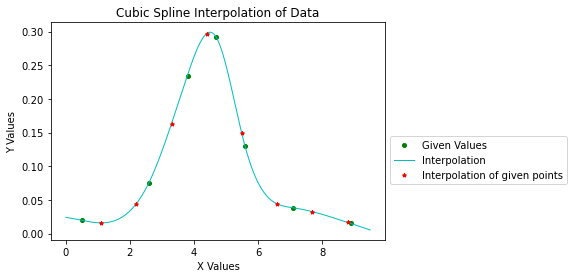

Interpolation of given points

Given x [1.1 2.2 3.3 4.4 5.5 6.6 7.7 8.8]
Interpolated y [0.01589726558771072, 0.043694637562052406, 0.16200058636326656, 0.29675856728767197, 0.14924056982417114, 0.044140757175081376, 0.03256114678178771, 0.016574875966288927] 



In [9]:
plt.plot(xValues, yValues, 'go', label = "Given Values", markersize = 4)         # Plot the given values

xPlot = np.linspace(0, 9.5, 1000)
yPlot = Spline(xValues, yValues, xPlot)   
plt.plot(xPlot, yPlot,"c", label = "Interpolation", lw = 1)    # plot the interpolation function

splineY = Spline(xValues, yValues, interpX)
plt.plot(interpX, splineY, 'r*', label = "Interpolation of given points", markersize = 4) # plot the interpolation points

#plot heading and title
plt.title("Cubic Spline Interpolation of Data")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend(bbox_to_anchor=(1.0, 0.5)); #legend outside of plot
plt.show()

print("Interpolation of given points\n")    # test prints to check that the plot makes sense
print("Given x",interpX)
print("Interpolated y",splineY,"\n")

# Part 4

Use the same (x,y) dataset from Part 1.

Here in Part 4, you will interpolate the data using a Fourier series / trigonometric functions.  Start by ensuring that you know what size of matrix you should use and the anticipated harmonics.  As well, you must estimate a periodicity for the data points so that you can specify a reasonable wavelength and wavenumber k to include in the functions.  Then, poplulate the matrix with the appropriate values from the trigonometric relations.  Once completed, call use your BackSub(A, b) function from Lab 4 to solve for the polynomial coefficients.  Once determined, the interpolated function can be calculated by the sum of the finite Fourier series.

For output, plot the interpolated function from $ x = $ 0 to 9.5, along with the points from the data set.  As well, output the interpolated values for the following $x$-values:

1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8

**QUESTION: Describe how you chose your value for the wavelength / wavenumber.**

In [10]:
import math as m 
#use the function floor to get the fourier pattern

In [11]:
k = 2*np.pi/(9 - 1.5) # k value based on the wavelength in part 3

# function to determine the coeff for the fourier method
def FourCoeff (x,y,k):
    A = [] # empty array
    
    for i in range (len(x)): 
        A.append([1/2, np.cos(k*x[i]), np.sin(k*x[i]), np.cos(2*k*x[i]), np.sin(2*k*x[i]), np.cos(3*k*x[i]), np.sin(3*k*x[i])])
   
    A = np.array(np.array(A).reshape((7, 7)))
    b = [y]
    coeffs = BackSub(A, b) # call the backsub function to solve the array
    return coeffs

# function to compute the Fourier extrapolated fits
def Fourier(x, y, X, k):    
    c = FourCoeff(x,y,k) # call the coeff function set to c
    #print("The coefficients are:\n",coeffs) #test print
    
    fourier = c[0]/2 #declare the inital term
    for j in range(1, m.floor((len(x)-1)/2) + 1): # calculate the trigonometric series using the specific fourier pattern
        fourier += c[2*j - 1]*np.cos(j*k*X) + c[2*j]*np.sin(j*k*X)
        
    return fourier
    

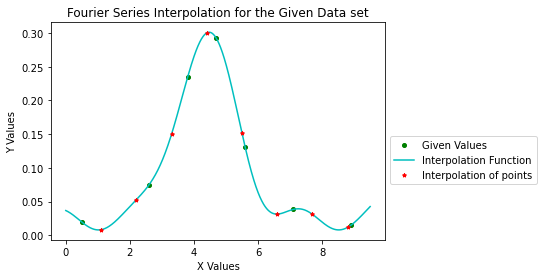

Interpolation of given points
Given x [1.1 2.2 3.3 4.4 5.5 6.6 7.7 8.8]
Calculated y [0.00834584 0.05265544 0.14982858 0.30015228 0.15129354 0.03145695
 0.03107784 0.01190623] 



In [12]:
# Plot the Spline interpolation with the given data
plt.plot(xValues, yValues, 'go', label = "Given Values", markersize = 4) # plot the given data set


# plot the interpolation Function
yPlot = Fourier(xValues,yValues,xPlot,k)
plt.plot(xPlot, yPlot, 'c',label = "Interpolation Function")

interpX = np.array([1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8])
FourierY = Fourier(xValues, yValues,interpX,k)  # Calculate the y for each x point
plt.plot(interpX, FourierY, 'r*', label = "Interpolation of points", markersize = 4)

plt.title("Fourier Series Interpolation for the Given Data set")      
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend(bbox_to_anchor=(1.0, 0.5)) # putting the legend outside the plot


plt.show()


print("Interpolation of given points")    # test prints to check that the plot makes sense
print("Given x",interpX)
print("Calculated y",FourierY,"\n")


In [13]:
# this plot matches the spline plot from part 3
# what would happen if I decreased k?

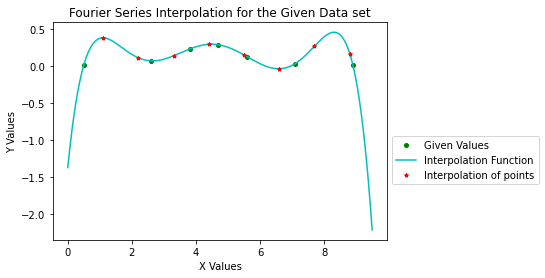

Interpolation of given points
Given x [1.1 2.2 3.3 4.4 5.5 6.6 7.7 8.8]
Calculated y [ 0.38590829  0.11636016  0.14261916  0.29799771  0.15496784 -0.03212544
  0.27318162  0.17362657] 



In [14]:
# testing the function using a different k value
k = 2*np.pi/100

# Plot the Spline interpolation with the given data
plt.plot(xValues, yValues, 'go', label = "Given Values", markersize = 4) # plot the given data set

# plot the interpolation Function
yPlot = Fourier(xValues,yValues,xPlot,k)
plt.plot(xPlot, yPlot, 'c',label = "Interpolation Function")

interpX = np.array([1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8])
interpY = Fourier(xValues, yValues,interpX,k)  # Calculate the y for each x point
plt.plot(interpX, interpY, 'r*', label = "Interpolation of points", markersize = 4)

plt.title("Fourier Series Interpolation for the Given Data set")      
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend(bbox_to_anchor=(1.0, 0.5)) # putting the legend outside the plot

plt.show()


print("Interpolation of given points")    # test prints to check that the plot makes sense
print("Given x",interpX)
print("Calculated y",interpY,"\n")


In [15]:
# this returns a plot much more similar to the ones in part 1 and 2
# this may imply that the k value from earlier was too large

# Part 5

None of the interpolation methods was particularly perfect, which is surprising as the function is a fairly simple, symmetric one -- a Lorentzian

$\large Lorentzian(x) = \frac{1}{\pi} \frac{\Gamma}{(x-x_0)^2 + \Gamma^2}$

The actual, calculated values for the $x$-values

1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8

are

0.02677123, 0.05450512, 0.14403162, 0.31830989, 0.14403162, 0.05450512, 0.02677123, 0.01563408


Discuss in a short paragraph which interpolation method you find to be the best choice for this Lorentzian function.  You may consider all aspects of the process such as error, usability, time to code, time to run, etc, and not simply the graphical output.  Some calculations to support your answer would also be reasonable.

In [16]:
# two things to consider is how accurate each method was, further the deviation from the actual values of the function
# secound the run time of the method

actY = [0.02677123, 0.05450512, 0.14403162, 0.31830989, 0.14403162, 0.05450512, 0.02677123, 0.01563408]

# function to calculate the standard deviation of each function passed, from the actual y values
def deviation(y, Ycalc):
    d = 0
    for a in range(len(y)): 
        d += (y[a] - Ycalc[a])**2
        
    deviation = (d/len(y))**0.5
    return deviation

deviationDict = {"Polynomial":deviation(actY, polyY), "Lagrange":deviation(actY, LagY), "Cubic Spline":deviation(actY, splineY), "Fourier":deviation(actY, FourierY)}

print("Standard Deviation of each method:\n",deviationDict)
bestDev = min(deviationDict)
print("\nThe method witht the smallest standard deviation is:",bestDev,"with a deviation of",deviationDict[bestDev])


Standard Deviation of each method:
 {'Polynomial': 0.170504347160567, 'Lagrange': 0.17050434716209223, 'Cubic Spline': 0.01220355636599183, 'Fourier': 0.012857960891326129}

The method witht the smallest standard deviation is: Cubic Spline with a deviation of 0.01220355636599183


In [17]:
# Now we can test the runtime of each method


In [18]:
print("The runtime of the Polynomial method:")
%timeit InterpY(xPlot, yValues)

The runtime of the Polynomial method:
713 µs ± 22.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
print("The runtime of the Lagrangian method:")
%timeit interpL(xPlot,xValues, yValues)

The runtime of the Lagrangian method:
78.6 ms ± 2.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [30]:
print("The runtime of the Cubic Spline method:")
%timeit Spline(xValues, yValues, xPlot)


The runtime of the Cubic Spline method:
10.7 ms ± 380 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
k = 2*np.pi/(9-1.5)
print("The runtime of the Fourier method:")

%timeit Fourier(xValues, yValues, xPlot, k)

The runtime of the Fourier method:
701 µs ± 35.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


The two methods of testing which interpolation would be the best fit for the Lorentzian function were the accuracy of the interpolation points using a standard deviation from the actaul values and the run time of each method.

The method witht the smallest standard deviation is: Cubic Spline with a deviation of 0.01220355636599183

Followed by the Fourier method with a deviation of 0.012857960891326129

Next is the run time. The method with the lowest run time is The Polynomial method: 1.09 ms ± 70 µs per loop
followed by the Fourier method: 1.29 ms ± 178 µs per loop

Therefore if one were to take both of these factors into consideration the fourier method seems to be the best pick.

One must also consider factors such as ease of implementation. Although the Fourier method was tricky to get the proper pattern the actual length of conditions for implementation was small making it relivitly ease to program. As well, the Fourier series plots seem to match that of the other methods indicating it is precise and accurate. Therefore, after considering several factors the fourier method is the optimal choice to compute the Lorentzian function.

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.

All code was written by Nathan Pacey, with topics discussed with Ekin Yelkin.